[  1.08101839e-01   9.17221177e+09   3.33160847e+05]
[  2.03886234e-10   3.26041601e+16   3.27407220e+16]


<IPython.core.display.Javascript object>


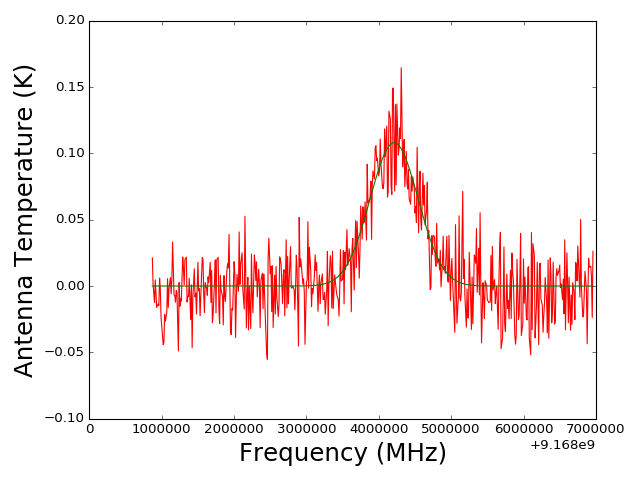

In [6]:
import numpy as np, scipy, matplotlib
import matplotlib.pyplot as pl
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
from scipy.signal import detrend
import scipy.constants as const
%matplotlib notebook

g034_freq, g034_temp = np.loadtxt("G034.133.dat", unpack = 1)

#Get the stupid frequencies in ascending order
g034_freq = g034_freq[:: -1] * 1e6
g034_temp = g034_temp[:: -1]

#Trim off the first 500 samples corresponding to bad baseline
g034_freq = g034_freq[500:]
g034_temp = g034_temp[500:]

#detrend the signal to bring it down to earth
g034_temp = detrend(g034_temp, type = 'constant')

#pl.plot(g034_freq[500: 1000], g034_temp[500: 1000])

#Script to fit a gaussian

def gaussian(x, a, b, c):
    
    return a * np.exp(-(x - b) ** 2 / (2 * c ** 2))

popt, pconv = curve_fit(gaussian, g034_freq[500: 1000], g034_temp[500: 1000], p0 = (1, 9170e6, 2e6), maxfev = 2000)

print(popt)
print(np.diag(pconv) ** 2)

hpbw = popt[2] * 2.355 

fig, ax = pl.subplots()

ax.plot(g034_freq[500: 1000], g034_temp[500: 1000], color = 'r', label = 'data')
ax.plot(g034_freq[500: 1000], gaussian(g034_freq[500: 1000], *popt), color = 'g', label = 'fit')

ax.set_xlabel("Frequency (MHz)", fontsize = 22)
ax.set_ylabel("Antenna Temperature (K)", fontsize = 22)

fig.tight_layout()

In [7]:
#Calculate electron temperature
#Look at equation 7.35

T_e = const.m_p * (const.c ** 2 / (8 * np.log(2) * const.k) ) * (hpbw / popt[1]) ** 2 

print T_e

14367.5327268


In [9]:
#Calculate the line brightness and EM here (Eq 7.97 in ERA):

A_e = 5262.9792822
omega = 1.87605047039e-07  #These values taken from continuum_analysis notebook

T_b = gaussian(popt[1], *popt) * const.c ** 2 / (A_e * omega * popt[1] ** 2)

print "Brightness temperature:", T_b

Brightness temperature: 0.116963448318


In [10]:
#EM stuff here:

EM = T_b * (T_e ** 1.5) * (hpbw / 1e3) / (1.92e3)

print EM

82312.7470909


In [13]:
#Estimate source size here using ERA eq. 7.95 and assuming all EM comes from source, none
#from electrons along LOS:

n_e = 1e3 #Need to find references for this. Source is Cas A

L = EM / (n_e ** 2)

#convert L to lyr:
#L = L * 3.26156

print "Source size:", L, "pc"

Source size: 0.0823127470909 pc
